In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/social_media_usage.csv')
data.head()

User_ID        App  Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  \
0     U_1  Pinterest                  288             16             94   
1     U_2   Facebook                  192             14            117   
2     U_3  Instagram                  351             13            120   
3     U_4     TikTok                   21             20            117   
4     U_5   LinkedIn                  241             16              9   

   Follows_Per_Day  
0                0  
1               15  
2               48  
3                8  
4               21

In [ ]:
data.drop(columns = "User_ID", inplace = True)
data.head()

App  Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  \
0  Pinterest                  288             16             94   
1   Facebook                  192             14            117   
2  Instagram                  351             13            120   
3     TikTok                   21             20            117   
4   LinkedIn                  241             16              9   

   Follows_Per_Day  
0                0  
1               15  
2               48  
3                8  
4               21

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   App                  1000 non-null   object
 1   Daily_Minutes_Spent  1000 non-null   int64 
 2   Posts_Per_Day        1000 non-null   int64 
 3   Likes_Per_Day        1000 non-null   int64 
 4   Follows_Per_Day      1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
data.describe().T

count     mean         std  min     25%    50%    75%  \
Daily_Minutes_Spent  1000.0  247.368  146.371921  5.0  112.75  246.0  380.5   
Posts_Per_Day        1000.0   10.269    6.121774  0.0    5.00   10.0   16.0   
Likes_Per_Day        1000.0   94.682   57.560943  0.0   44.75   94.0  142.0   
Follows_Per_Day      1000.0   24.698   14.842948  0.0   12.00   24.0   38.0   

                       max  
Daily_Minutes_Spent  500.0  
Posts_Per_Day         20.0  
Likes_Per_Day        200.0  
Follows_Per_Day       50.0

In [ ]:
data.select_dtypes(include = "object").describe().T

count unique       top freq
App  1000      7  Snapchat  156

In [ ]:
data.isnull().sum()

App                    0
Daily_Minutes_Spent    0
Posts_Per_Day          0
Likes_Per_Day          0
Follows_Per_Day        0
dtype: int64

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.nunique()

App                      7
Daily_Minutes_Spent    435
Posts_Per_Day           21
Likes_Per_Day          201
Follows_Per_Day         51
dtype: int64

<Axes: >

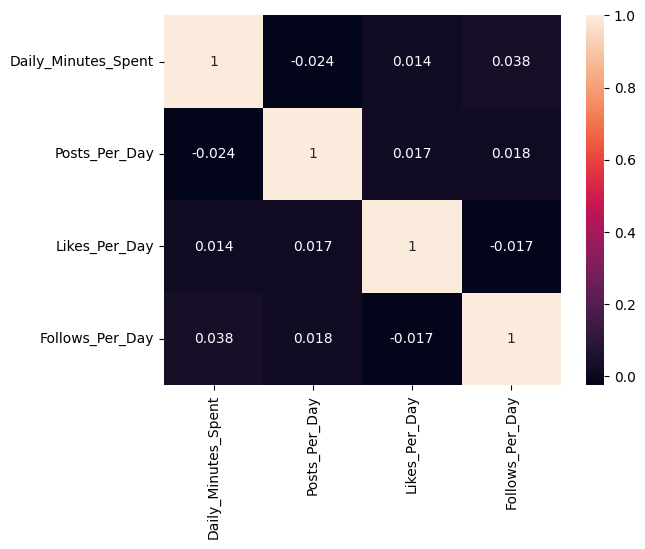

In [ ]:
import seaborn as sns
sns.heatmap(data.select_dtypes(include = "number").corr(), annot = True)

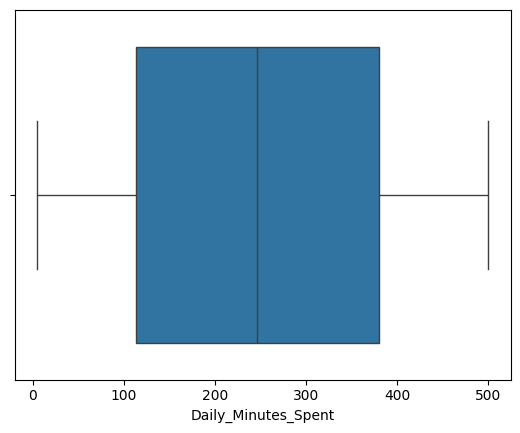

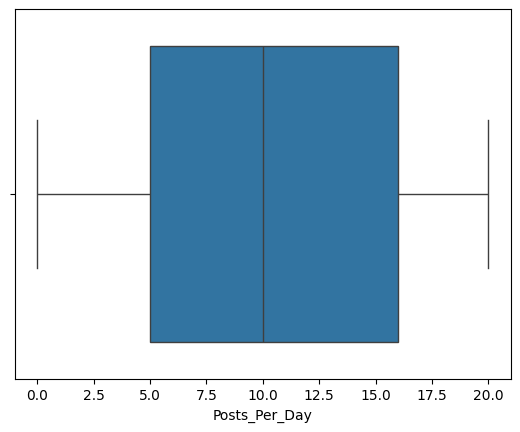

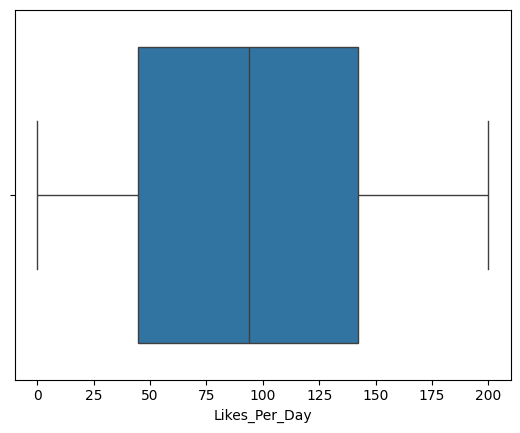

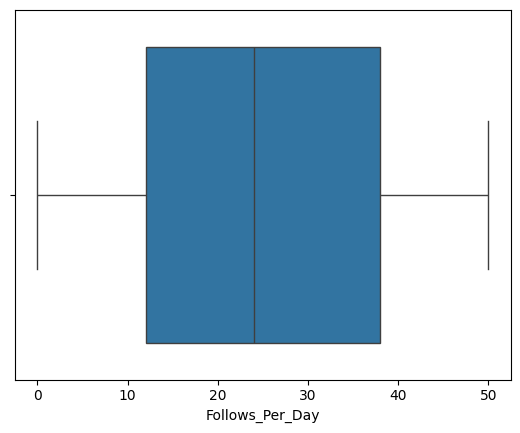

In [ ]:
numeric = data.select_dtypes(include = "number")

for i in numeric.columns:
  plt.figure()
  sns.boxplot(numeric, x = i)
  plt.show()

array([[<Axes: title={'center': 'Daily_Minutes_Spent'}>,
        <Axes: title={'center': 'Posts_Per_Day'}>],
       [<Axes: title={'center': 'Likes_Per_Day'}>,
        <Axes: title={'center': 'Follows_Per_Day'}>]], dtype=object)

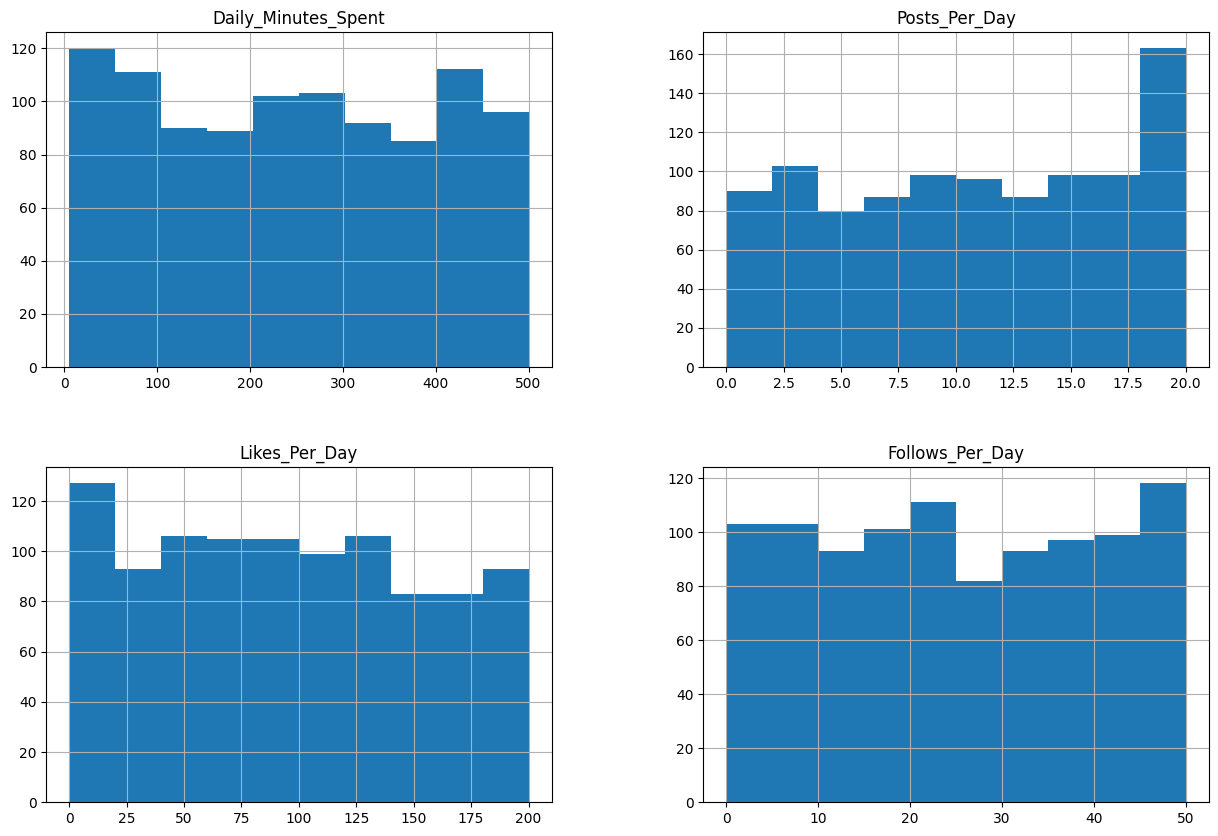

In [ ]:
data.hist(figsize = (15, 10))

In [ ]:
skewness = numeric.skew()
print(skewness)

Daily_Minutes_Spent    0.024168
Posts_Per_Day         -0.058441
Likes_Per_Day          0.100626
Follows_Per_Day        0.036555
dtype: float64


In [ ]:
copy_data = data.iloc[:,1:]
copy_data.head()

Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  Follows_Per_Day
0                  288             16             94                0
1                  192             14            117               15
2                  351             13            120               48
3                   21             20            117                8
4                  241             16              9               21

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(copy_data)
scaled_data = pd.DataFrame(scaled_data, columns = copy_data.columns)
scaled_data.head()

Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  Follows_Per_Day
0             0.277733       0.936635      -0.011854        -1.664788
1            -0.378459       0.609769       0.387922        -0.653701
2             0.708359       0.446336       0.440067         1.570689
3            -1.547300       1.590367       0.387922        -1.125542
4            -0.043527       0.936635      -1.489289        -0.249267

In [ ]:
data = data.drop(columns = copy_data.columns)
data = pd.concat([data, scaled_data], axis = 1)
data.head()

App  Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  \
0  Pinterest             0.277733       0.936635      -0.011854   
1   Facebook            -0.378459       0.609769       0.387922   
2  Instagram             0.708359       0.446336       0.440067   
3     TikTok            -1.547300       1.590367       0.387922   
4   LinkedIn            -0.043527       0.936635      -1.489289   

   Follows_Per_Day  
0        -1.664788  
1        -0.653701  
2         1.570689  
3        -1.125542  
4        -0.249267

In [ ]:
data = pd.get_dummies(data, drop_first = True)
data.head()

Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  Follows_Per_Day  \
0             0.277733       0.936635      -0.011854        -1.664788   
1            -0.378459       0.609769       0.387922        -0.653701   
2             0.708359       0.446336       0.440067         1.570689   
3            -1.547300       1.590367       0.387922        -1.125542   
4            -0.043527       0.936635      -1.489289        -0.249267   

   App_Instagram  App_LinkedIn  App_Pinterest  App_Snapchat  App_TikTok  \
0          False         False           True         False       False   
1          False         False          False         False       False   
2           True         False          False         False       False   
3          False         False          False         False        True   
4          False          True          False         False       False   

   App_Twitter  
0        False  
1        False  
2        False  
3        False  
4        False

In [ ]:
data.values

array([[0.27773312611372997, 0.9366349995937515, -0.01185424043724503,
        ..., False, False, False],
       [-0.37845854810654156, 0.6097688332724284, 0.38792219659594385,
        ..., False, False, False],
       [0.7083589123207832, 0.44633575011176674, 0.44006694925244677,
        ..., False, False, False],
       ...,
       [0.4827930243075648, -0.6976958320128643, 0.17934318596993226,
        ..., False, False, False],
       [0.3939337350902364, 0.7732019164330899, 0.97889606003631, ...,
        False, True, False],
       [-0.9047789534707177, 1.1000680827544131, -0.2378148352820909,
        ..., False, False, False]], dtype=object)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)

pca_fit = pca.fit(data.values)   # rows = indicators, columns = provinces
explained = pca.explained_variance_ratio_
print("Explained variance ratio:", explained)
np.cumsum(explained)  # cumulative explained variance

# Project into 2D
pc2 = pca_fit.transform(data.values)
pc_df = pd.DataFrame(pc2, index=data.index, columns=['PC1','PC2', 'PC3', 'PC4'])

Explained variance ratio: [0.21928816 0.21494646 0.21301445 0.19737801]


In [ ]:
pc_df

PC1       PC2       PC3       PC4
0   -1.077713  0.203430  0.450012  1.526192
1   -0.858355  0.468510  0.242383  0.280854
2    1.435372  1.094157 -0.025028 -0.436704
3   -2.188137  1.155684 -0.313389  0.319437
4   -0.191080  0.056425 -1.360028  1.108854
..        ...       ...       ...       ...
995  0.916638 -1.312340  0.812718  0.933482
996  2.197728  1.135571  0.176782  0.241319
997 -0.258557 -0.885404  0.893896  0.478756
998 -0.814297  0.601590  1.196358  0.891011
999 -0.180710  1.183210 -1.186227 -0.459315

[1000 rows x 4 columns]

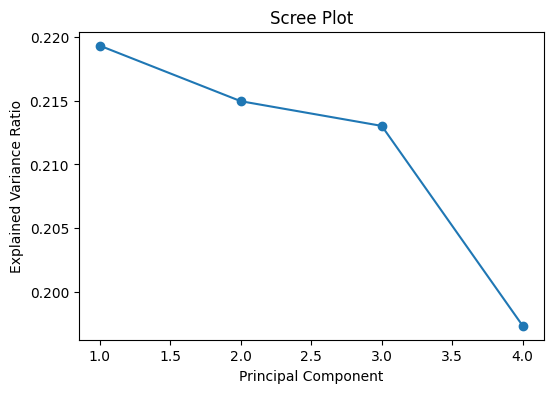

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(explained)+1), explained, '-o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


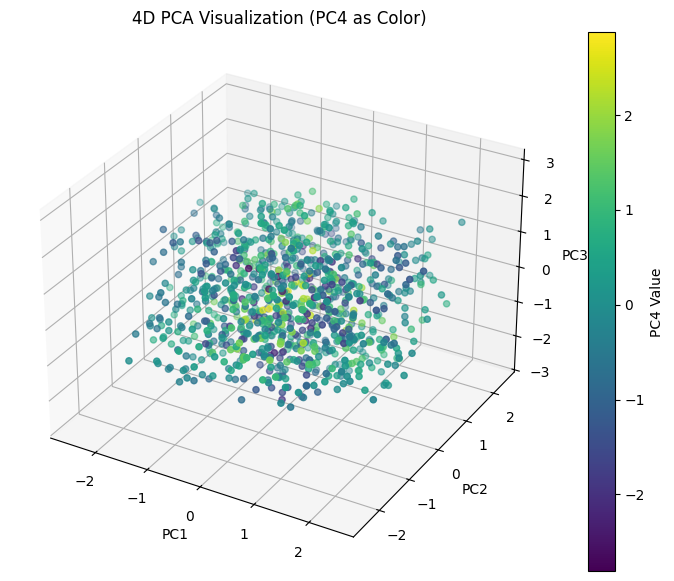

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# PCA with 4 components
pca = PCA(n_components=4)
pca_4d = pca.fit_transform(data)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    pca_4d[:,0],   # PC1
    pca_4d[:,1],   # PC2
    pca_4d[:,2],   # PC3
    c=pca_4d[:,3], # PC4 as color
    cmap='viridis'
)

plt.colorbar(sc, label='PC4 Value')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("4D PCA Visualization (PC4 as Color)")
plt.show()


In [ ]:
loadings = pd.DataFrame(pca.components_.T, index=data.columns, columns=[f'PC{i+1}' for i in range(4)])
display(loadings)

PC1       PC2       PC3       PC4
Daily_Minutes_Spent  0.716978 -0.042222  0.402139  0.566775
Posts_Per_Day       -0.173097  0.834004 -0.251430  0.458047
Likes_Per_Day       -0.118230  0.431635  0.804687 -0.389480
Follows_Per_Day      0.664332  0.338965 -0.356732 -0.562288
App_Instagram        0.014645  0.031340  0.005996  0.012377
App_LinkedIn        -0.006905  0.002630 -0.000074 -0.015277
App_Pinterest       -0.008822  0.005299 -0.013059 -0.000521
App_Snapchat         0.015765 -0.005278  0.001343 -0.001961
App_TikTok          -0.008551 -0.020063 -0.007503 -0.013416
App_Twitter          0.001906  0.000100 -0.004928  0.022940

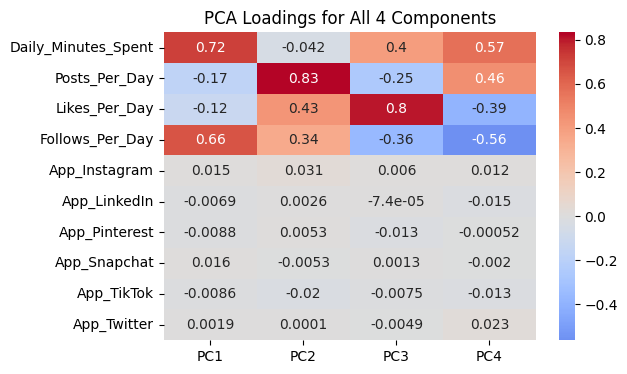

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0)
plt.title("PCA Loadings for All 4 Components")
plt.show()


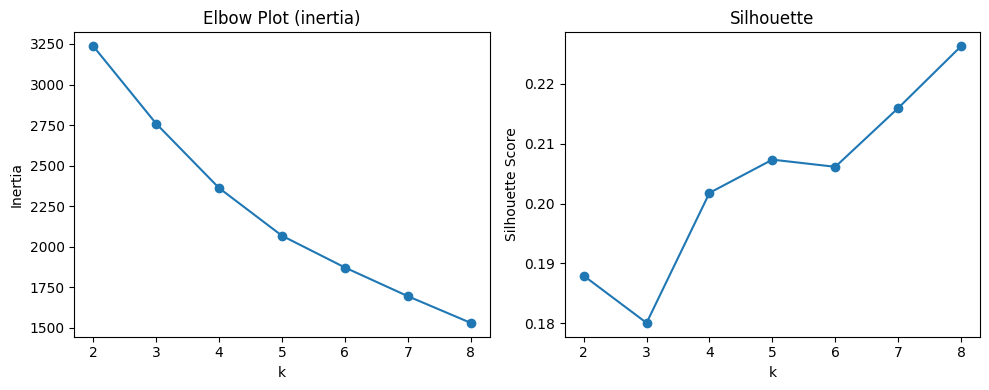

Silhouette scores: {2: np.float64(0.1879512702503443), 3: np.float64(0.18007342442366384), 4: np.float64(0.20177621841058885), 5: np.float64(0.20732565920251478), 6: np.float64(0.20612678315104097), 7: np.float64(0.21593834496398684), 8: np.float64(0.22626737905361716)}


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


X_cluster = pca_fit.transform(data.values)[:, :4]

# Try K from 2..8 and compute silhouette
sil_scores = []
inertia = []
K_range = range(2,9)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_cluster)
    sil = silhouette_score(X_cluster, labels)
    sil_scores.append(sil)
    inertia.append(kmeans.inertia_)

# plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(list(K_range), inertia, '-o')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow Plot (inertia)')
plt.subplot(1,2,2)
plt.plot(list(K_range), sil_scores, '-o')
plt.xlabel('k'); plt.ylabel('Silhouette Score'); plt.title('Silhouette')
plt.tight_layout()
plt.show()

print("Silhouette scores:", dict(zip(K_range, sil_scores)))

In [ ]:
k_final = 2
kmeans = KMeans(n_clusters=k_final, random_state=42, n_init=50)
clusters = kmeans.fit_predict(X_cluster)
df_clusters = pd.DataFrame({'indicator': data.index, 'cluster': clusters})

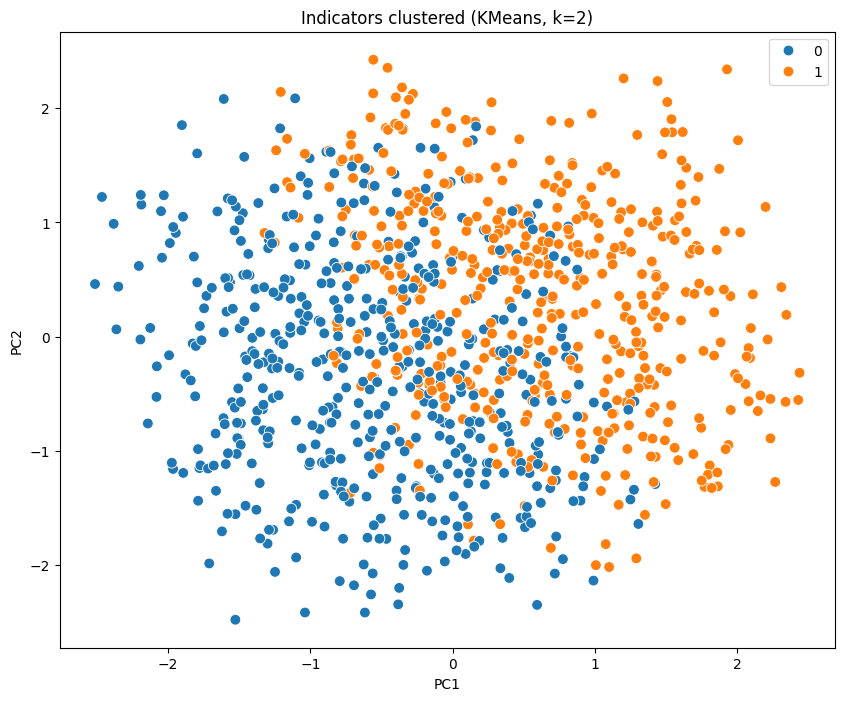

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=pc_df['PC1'], y=pc_df['PC2'], hue=clusters, palette='tab10', s=60)
plt.title(f'Indicators clustered (KMeans, k={k_final})')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    pc_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color=clusters.astype(str),
    title=f'Interactive 3D PCA Cluster Plot (k={k_final})',
    opacity=0.8
)

fig.show()


In [ ]:
cluster_map = dict(zip(df_clusters['indicator'], df_clusters['cluster']))

# attach cluster to data
df_with_cluster = data.copy()
df_with_cluster['cluster'] = df_with_cluster.index.map(cluster_map)

# compute cluster means (original percentages)
cluster_summary = df_with_cluster.groupby('cluster').mean()
display(cluster_summary)

# also display top indicators per cluster (e.g., those with highest z-score within cluster)
from scipy.stats import zscore
zs = data.div(data.mean(axis=1), axis=0)  # alternative simple ratio


Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  Follows_Per_Day  \
cluster                                                                       
0                  -0.025076      -0.070100       0.091531        -0.834359   
1                   0.027057       0.075638      -0.098762         0.900275   

         App_Instagram  App_LinkedIn  App_Pinterest  App_Snapchat  App_TikTok  \
cluster                                                                         
0             0.123314      0.148362       0.142582      0.140655    0.156069   
1             0.158004      0.145530       0.137214      0.172557    0.124740   

         App_Twitter  
cluster               
0           0.136802  
1           0.143451

In [ ]:
clustered = pd.DataFrame({
    "indicator": data.index,
    "cluster": kmeans.labels_
})

clustered.sort_values("cluster")


indicator  cluster
19          19        0
16          16        0
14          14        0
13          13        0
12          12        0
..         ...      ...
28          28        1
25          25        1
5            5        1
999        999        1
2            2        1

[1000 rows x 2 columns]

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=k_final, linkage='ward')
agg_labels = agg.fit_predict(X_cluster)
df_clusters['cluster_agg'] = agg_labels


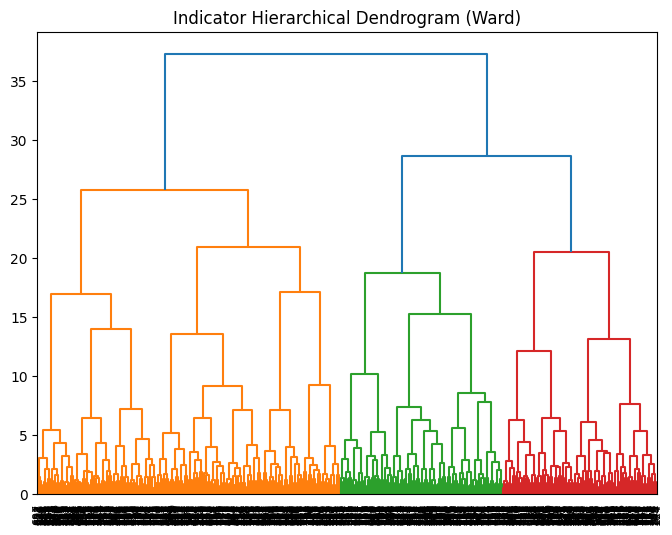

In [ ]:
import scipy.cluster.hierarchy as sch
linkage = sch.linkage(X_cluster, method='ward')
plt.figure(figsize=(8,6))
dn = sch.dendrogram(linkage, labels=data.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Indicator Hierarchical Dendrogram (Ward)')
plt.show()
